In [40]:
from thinkdsp import CosSignal, SinSignal

sig1 = CosSignal(freq=440*1.06, amp=2.0, offset=0)
sig2 = SinSignal(freq=440*1.06**5, amp=1.0, offset=0)
sig3 = CosSignal(freq=440*1.06**3, amp=1.0, offset=0)

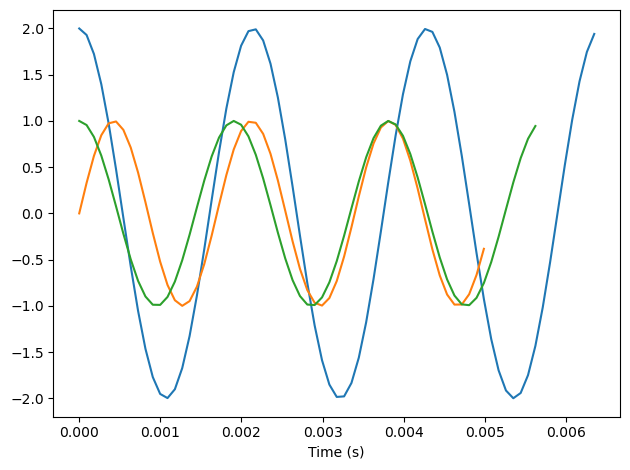

In [41]:
from thinkdsp import decorate

sig1.plot()
sig2.plot()
sig3.plot()

decorate(xlabel='Time (s)')

 Утворимо новвий сигнал `mix` як суму двох попередніх.

In [42]:
mix = sig1+sig2+sig3

mix.make_wave(duration=0.5, start=0, framerate=11025)

Ось, як він виглядає.

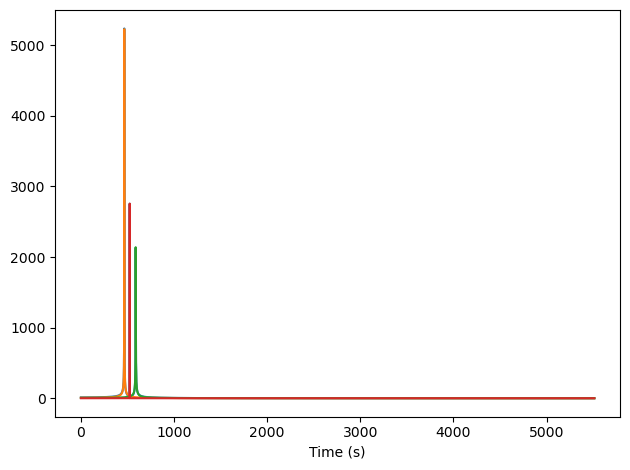

In [43]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave1 = sig1.make_wave(duration=0.5, start=0, framerate=11025)
wave2 = sig2.make_wave(duration=0.5, start=0, framerate=11025)
wave3 = sig3.make_wave(duration=0.5, start=0, framerate=11025)

mix_sp = wave.make_spectrum()
sig1_sp = wave1.make_spectrum()
sig2_sp = wave2.make_spectrum()
sig3_sp = wave3.make_spectrum()

mix_sp.plot()
sig1_sp.plot()
sig2_sp.plot()
sig3_sp.plot()

decorate(xlabel='Time (s)')

In [56]:
def stretch(self, factor):
    self.framerate *= factor
    
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
audio = Audio(data=wave.ys, rate=wave.framerate)
audio


In [45]:
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

In [61]:
from thinkdsp import read_wave
pinch = read_wave('pinch.wav')
nopinch = read_wave('nopinch.wav')
pinch.make_audio()


Накладаємо графіки сигналу з флажолетом (оранжевий) і без нього (синій):

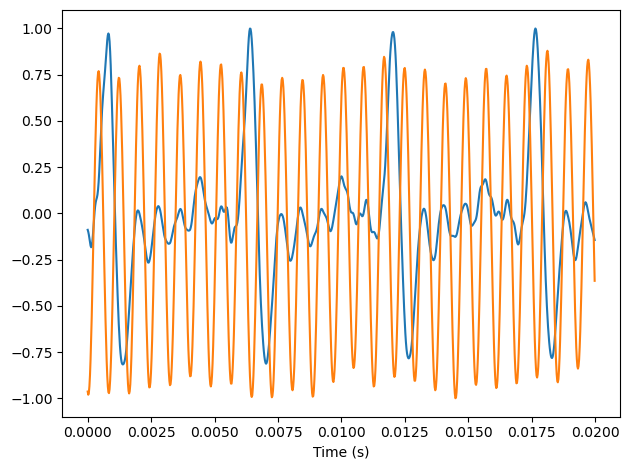

In [47]:
segment = nopinch.segment(0,0.02)
segment.plot()
decorate(xlabel='Time (s)')

pinchseg = pinch.segment(0,0.02)
pinchseg.plot()
decorate(xlabel='Time (s)')

In [48]:
spectrum = segment.make_spectrum()
pinch_spectrum = pinchseg.make_spectrum()
pinch_spectrum_2 = pinchseg.make_spectrum()

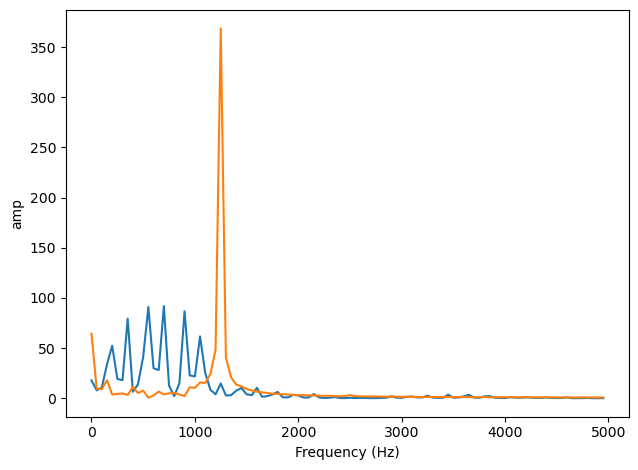

In [49]:
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)', ylabel='amp')
pinch_spectrum.plot(high=5000)

Застосовуємо фільтри:

In [50]:
spectrum.low_pass(1000)
pinch_spectrum.high_pass(1000)
pinch_spectrum_2.band_stop(1100,2000)

Перетворюємо спектри на вейви:

In [51]:
low = spectrum.make_wave()
high = pinch_spectrum.make_wave()
band = pinch_spectrum_2.make_wave()

лол

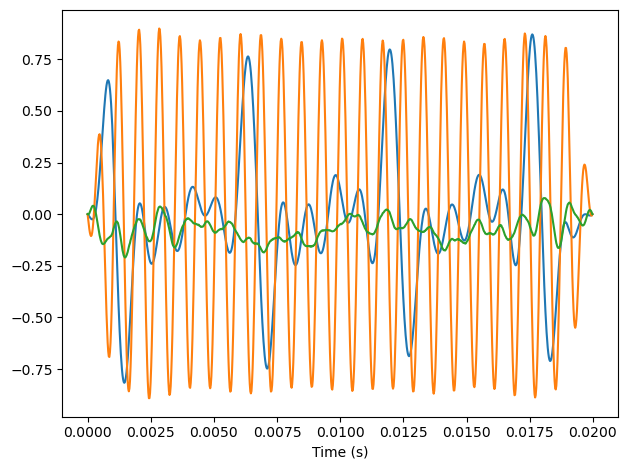

In [52]:
low.apodize()
high.apodize()
band.apodize()
low.plot()
high.plot()
band.plot()
decorate(xlabel='Time (s)')

In [53]:
high.make_audio()

In [54]:
low.make_audio()

In [55]:
band.make_audio()